In [2]:
import json 
import pandas as pd 
import numpy as np
with open('response1.json') as f:
    d = json.load(f)

In [3]:
d["results"][0]["attributes"] 
#ahora veo una lista de atributos, cada uno de ellos es un diccionario con las mismas "keys" 

[{'id': 'ITEM_CONDITION',
  'value_id': '2230581',
  'value_name': 'Usado',
  'attribute_group_id': '',
  'source': 1,
  'name': 'Condición del ítem',
  'value_struct': None,
  'values': [{'id': '2230581', 'name': 'Usado', 'struct': None, 'source': 1}],
  'attribute_group_name': ''},
 {'id': 'HAS_TELEPHONE_LINE',
  'name': 'Línea telefónica',
  'attribute_group_id': 'CARACTERISTICAS',
  'values': [{'id': '242084',
    'name': 'No',
    'struct': None,
    'source': 4709975701260268}],
  'attribute_group_name': 'Características adicionales',
  'source': 4709975701260268,
  'value_id': '242084',
  'value_name': 'No',
  'value_struct': None},
 {'value_name': 'No',
  'value_struct': None,
  'attribute_group_id': 'COMOYAMEN',
  'attribute_group_name': 'Comodidades y amenities',
  'source': 4709975701260268,
  'id': 'HAS_AIR_CONDITIONING',
  'name': 'Aire acondicionado',
  'value_id': '242084',
  'values': [{'name': 'No',
    'struct': None,
    'source': 4709975701260268,
    'id': '242084'

In [4]:
#puedo iterar sobre la lista de atributos porque comparten las keys para hacer un nuevo diccionario
dict_global = {}
for j in range(len(d["results"])):
     dict_attr = {}
     for i in range(len(d["results"][j]["attributes"])): #numero de atributos por ítem, no siempre es 10
          dict_attr [d["results"][j]["attributes"][i]["name"]] = d["results"][j]["attributes"][i]["value_name"] 
     dict_global[d["results"][j]["id"]] = dict_attr

In [5]:
df_attr = pd.DataFrame.from_dict(dict_global)

In [6]:
df_att=df_attr.T.drop(['Tour virtual'], axis=1)

Los rasgos básicos de la base de datos son los que vienen desde el objeto de atributos del JSON

| Nombre | Tipo de variable |
| --- | --- |
| Condición del ítem | Binaria |
| Línea telefónica | Binaria |
| Dormitorios | Binaria |
| Superfice cubierta | Entero? m2|
| Baños | Entero |
| Ambientes | Entero | 
| Superficie total | Entero? m2| 
| Operación | Binario |
| Inmueble | Binario |

Deberia poder sacar las unidades de las columnas de area """.str.replace"""

In [7]:
df_att[["Superficie cubierta","Superficie total"]] = df_att[["Superficie cubierta","Superficie total"]].replace({'m²':''}, regex=True)

Extraigo otros valores que me pueden interesar

In [8]:
dict_select = {}
dict_global2 = {}

In [9]:
for i in range (len(d["results"])):
    dict_select = {}
    dict_select["price"] = d["results"][i]["price"]
    dict_select["currency_id"] = d["results"][i]["currency_id"]
    dict_select["stop_time"] = d["results"][i]["stop_time"]
    dict_select["official_store_id"] = d["results"][i]["official_store_id"]
    dict_select["seller.id"] = d["results"][i]["seller"]["id"]
    dict_select["location.longitude"] = d["results"][i]["location"]["longitude"]
    dict_select["location.latitude"] = d["results"][i]["location"]["latitude"]
    dict_select["location.address_line"] = d["results"][i]["location"]["address_line"]
    dict_select["location.country.id"] = d["results"][i]["location"]["country"]["id"]
    dict_select["prices_last_updated"] = d["results"][i]["prices"]["prices"][0]["last_updated"]
    dict_global2[d["results"][i]["id"]] = dict_select

In [49]:
df_select = pd.DataFrame.from_dict(dict_global2)

In [50]:
df_select.T.head()

,price,currency_id,stop_time,official_store_id,seller.id,location.longitude,location.latitude,location.address_line,location.country.id,prices_last_updated
MLA1130578098,43500,ARS,2022-06-03T04:00:00.000Z,2695,155651025,-58.457867,-34.61696,Donato Alvarez al 700,AR,2022-04-04T18:23:46Z
MLA1130495400,60000,ARS,2022-06-02T15:59:33.000Z,None,173700530,-58.461285,-34.54327,"Av. del Libertador & Manzanares, Buenos Aires,...",AR,2022-04-03T02:49:46Z
MLA1130906965,35000,ARS,2022-06-05T04:00:00.000Z,None,132756485,-60.629326,-32.957275,Zeballos al 300,AR,2022-04-06T11:22:45Z
MLA1130879219,45000,ARS,2022-06-04T04:03:59.000Z,None,16987222,-58.44402,-34.61069,"Colpayo 848, AWN, Buenos Aires, Argentina",AR,2022-04-05T21:41:50Z
MLA1130467824,80000,ARS,2022-06-02T04:04:48.000Z,None,716888392,-58.499332,-34.581936,"Griveo 2506, Buenos Aires, Argentina",AR,2022-04-03T04:50:34Z


df_select_ars= df_select.T[df_select.T.currency_id == "ARS"]

Había 8 en dolares solamente. Podria tomarme la molestia de seleccionar solo los deptos que esten en dolares, en vez de ajustar el precio dependiendo de la fecha. Podria haces Lotes bimestrales con los precios promedio del dolar 

In [51]:
df_features = df_select.T[["location.longitude","location.latitude","price"]].join(df_att)  

In [52]:
df_features = df_features.astype({'price' : "int64", 'location.longitude': 'float' , "location.latitude" : "float" , "Dormitorios" : "int32" , "Superficie cubierta" : "int32", "Baños" : "int32" , "Ambientes" : "int32" , "Superficie total" : "int32" })
df_features.dtypes

location.longitude     float64
location.latitude      float64
price                    int64
Condición del ítem      object
Línea telefónica        object
Aire acondicionado      object
Dormitorios              int32
Superficie cubierta      int32
Baños                    int32
Ambientes                int32
Superficie total         int32
Operación               object
Inmueble                object
dtype: object

In [53]:
import seaborn as sns

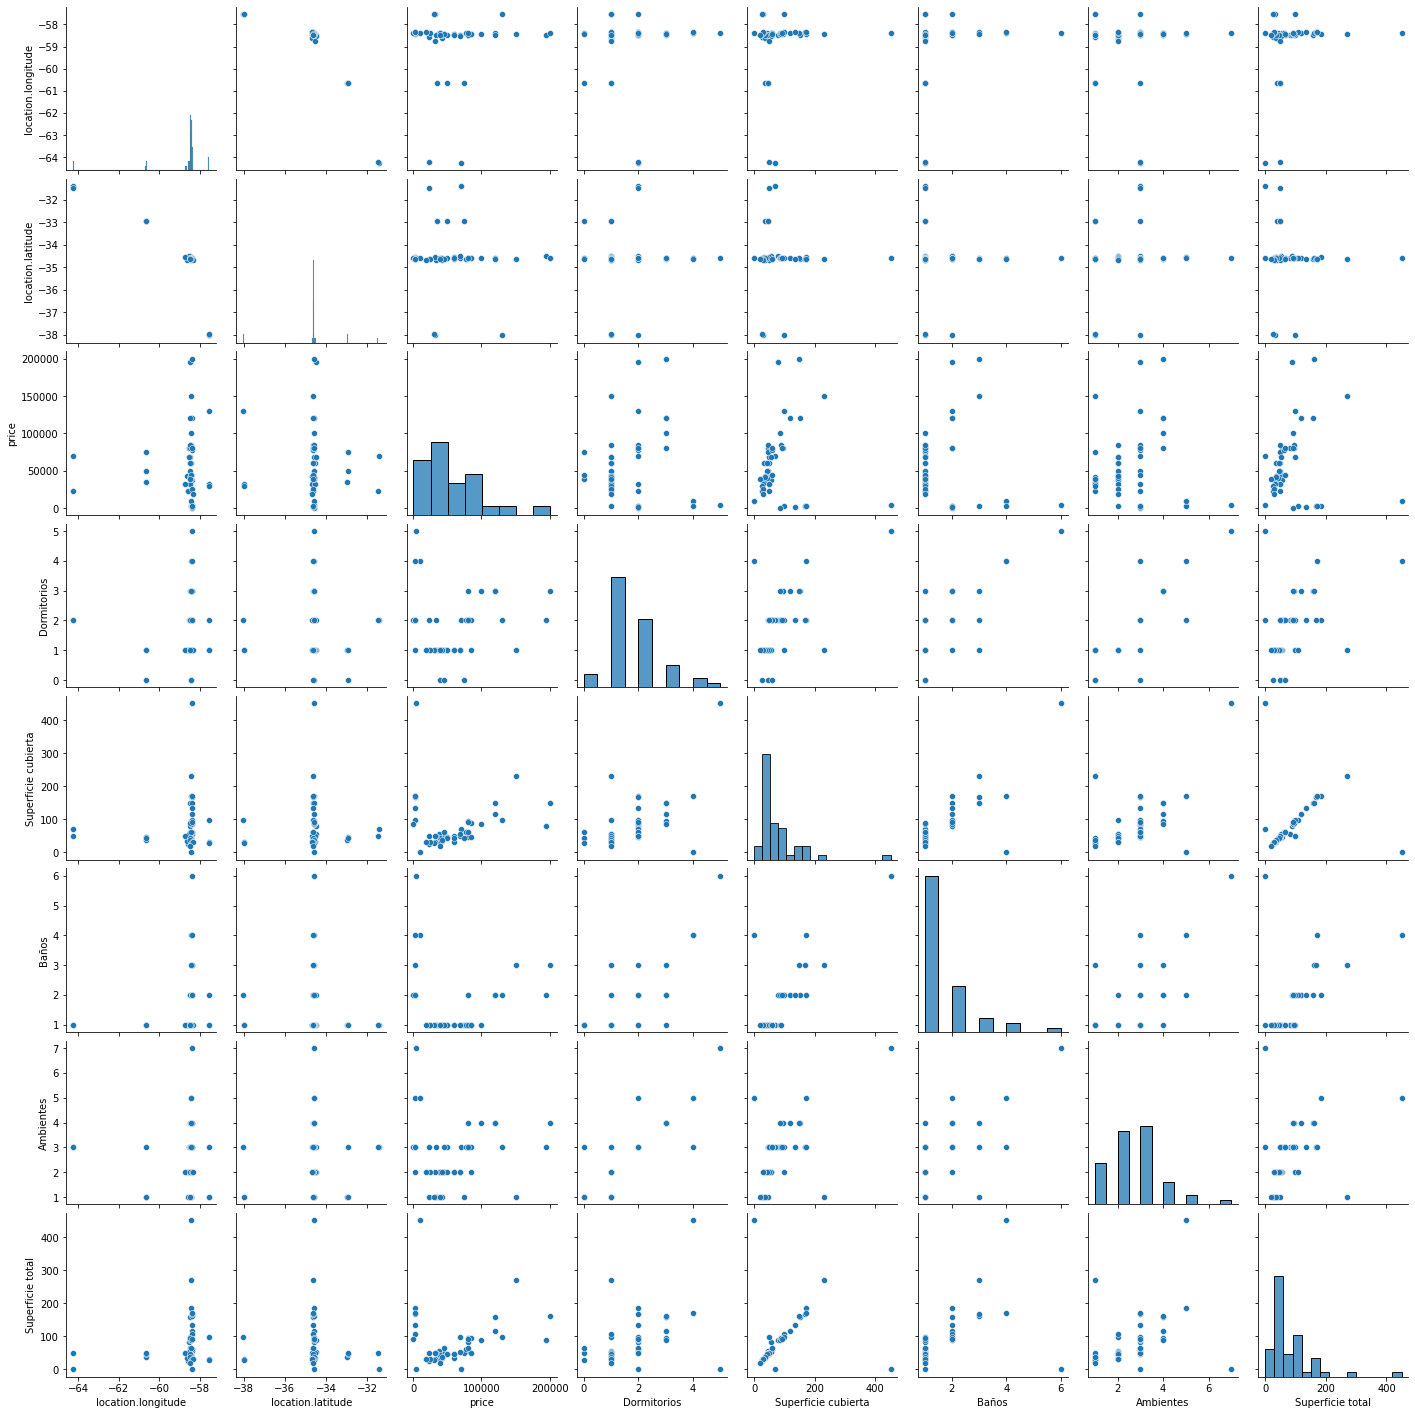

In [54]:
sns.pairplot(df_features)

# hay que pensar los pasos siguientes, ver los ejemplos de kaglee del precio de casas

Se podria hacer un intento naive, solo usar el metro cuadrado con OLS. Despues sumar la localización y pasar a MLS. 
Se podra usar una sola medida espacial? distancia de una arteria urbana? Los precios podrian indicar una estructura oculta en la geografia de la ciudad?